In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
# Let's get both the data
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [3]:
# Fake news
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Real/True news
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Let's insert a new column 'Real_or_Fake'.It will help when we combine both the tables in determining 
# Fake or Real news
fake['Real_or_Fake'] = 'Fake'
true['Real_or_Fake'] = 'Real'

**Combining fake and true table into one**

In [6]:
news = pd.concat([true,fake],axis=0,ignore_index=True)

# First 5 rows of the news table
news.head()

,title,text,subject,date,Real_or_Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


Fake    23481
Real    21417
Name: Real_or_Fake, dtype: int64


<AxesSubplot:xlabel='Real_or_Fake', ylabel='count'>

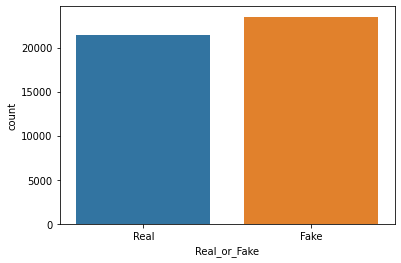

In [7]:
# Count of real and fake news
print(news['Real_or_Fake'].value_counts())

sns.countplot(x='Real_or_Fake',data=news)

In [8]:
# Let's check if there is any null value in text column.
news['text'].isnull().sum()

0

**There is no null value.But there might be empty string, we will deal with it later**

# Data Cleaning

**URL**

In [9]:
# Let's read one news
news['text'].iloc[33390]

'https://www.youtube.com/watch?v=6VN1maBEKIk'

**There might be a url provided in a news text which will not be useful as they provide no information in the form of text.We have to go to the url to obtain more information.Let's remove any url present in the text for all the news**

In [10]:
# Function to remove the url
def remove_url(text):
    text = text.split(' ')
    text1 = ''
    for word in text:
        if ('.com' in word) or ('https' in word) or ('bit.ly' in word):
            continue
        else:
            text1 += (word+' ')
    return text1

# Lets apply this on news text
news['text'] = news['text'].apply(remove_url)

**Empty String**

In [11]:
# Let's check if any news text is just an empty string

# empty will hold the index of the empty string text
empty = []

# for loop to find the empty string
for i,title,text,*_ in news.itertuples():
    if text.isspace() or text=='':
        empty.append(i)
        
# number of rows with empty string as form of news text
print(f"There are total {len(empty)} rows with empty string as news text")


There are total 715 rows with empty string as news text


In [12]:
# Let's remove these empty strings
news.drop(empty,inplace = True)

**HTML tags**

In [13]:
pip install beautifulsoup4

     |████████████████████████████████| 115 kB 1.3 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Let's remove any HTML tags present in news text
# We can use BeautifulSoup to do it
from bs4 import BeautifulSoup

# function to remove the HTML tags
def remove_html(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    
    return text

# Let's apply the above function on news text
news['text'] = news['text'].apply(remove_html)

In [15]:
# Let's read some more news
news['text'][0][:50]

'WASHINGTON (Reuters) - The head of a conservative '

In [16]:
news['text'][6][:50]

'WEST PALM BEACH, Fla (Reuters) - President Donald '

In [17]:
# WASHINGTON (Reuters) or SEATTLE/WASHINGTON (Reuters) are there at the begining of many news text.
# Our model might learn that if these words are at the begining of the news text,they must belong to one category and might 
# not try to learn from the text that follows.

# Let's go ahead and remove these words from the news text
# we will split the text on the basis of (Reuters) and ignore the first part

# function to perform the split
def split_news(text):
    if '(Reuters)' in text:
        text = text.split('(Reuters)')

        return ' '.join(text[1:])
    return text

# Applying the above function on the news text
news['text'] = news['text'].apply(split_news)

**Punctuation**

In [18]:
# Let's remove the punctuations from the news text
import string

punctuations = string.punctuation

# Lets add '\n','\n\n' and ' ' in punctuations
punctuations += '\n \n\n'

#function to remove the punctuations
def remove_punct(text):
    text = text.split(' ')
    text  = [word.lower() for word in text if word not in punctuations]
    
    return ' '.join(text)

# applying the above function in news text
news['text'] = news['text'].apply(remove_punct)

**Let's divide the data into X and y. X will be news text and y would be label- Fake or Real.**

In [19]:
X = news['text']
y = news['Real_or_Fake']

# Lets do the one hot encoding to convet y
encoded_y = pd.get_dummies(y,drop_first=True)

**1 in encoded_y means Real news and 0 means Fake news**

In [20]:
# Libraries to split the data into train and test data,create maodel and evaluating the matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report

In [21]:
# Lets split the data into train and test data. We will use 25% of the data as test data
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y.values.reshape(-1,),test_size=0.25,random_state=42)

**Naive_bayes model**

In [22]:
# creating a naive model
pipeline_naive = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

# training the model
pipeline_naive.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [23]:
# prediction
predict_naive = pipeline_naive.predict(X_test)

In [24]:
# Evaluating the naive model
acc_naive = accuracy_score(y_test,predict_naive)
print(f'Naive model has {acc_naive.round(2)*100}% accuracy')
print('\n')
print(classification_report(y_test,predict_naive))

Naive model has 93.0% accuracy


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5662
           1       0.93      0.92      0.93      5384

    accuracy                           0.93     11046
   macro avg       0.93      0.93      0.93     11046
weighted avg       0.93      0.93      0.93     11046



**Logistic Regression Model**

In [25]:
# creating a logistic model
pipeline_logistic = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression())
])

# training the model
pipeline_logistic.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

In [26]:
# prediction
predict_logistic = pipeline_logistic.predict(X_test)

In [27]:
# Evaluating the logistic model
acc_logistic = accuracy_score(y_test,predict_logistic)
print(f'LogisticRegression model has {acc_logistic.round(2)*100}% accuracy')
print('\n')
print(classification_report(y_test,predict_logistic))

LogisticRegression model has 98.0% accuracy


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5662
           1       0.97      0.98      0.98      5384

    accuracy                           0.98     11046
   macro avg       0.98      0.98      0.98     11046
weighted avg       0.98      0.98      0.98     11046



**LinearSVC model**

In [28]:
# creating a LinearSVC model
pipeline_svc = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',LinearSVC())
])

# training the model
pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LinearSVC())])

In [29]:
# prediction
predict_svc = pipeline_svc.predict(X_test)

In [30]:
# Evaluating the LinearSVC model
acc_svc = accuracy_score(y_test,predict_svc)
print(f'LinearSVC model has {acc_svc.round(2)*100}% accuracy')
print('\n')
print(classification_report(y_test,predict_svc))

LinearSVC model has 99.0% accuracy


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5662
           1       0.98      0.99      0.99      5384

    accuracy                           0.99     11046
   macro avg       0.99      0.99      0.99     11046
weighted avg       0.99      0.99      0.99     11046



Text(0, 0.5, 'Accuracy')

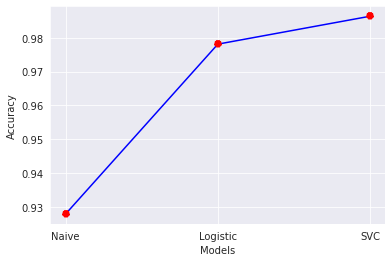

In [31]:
# Let's visualize the accuracy of all the three models
models = {
    'Naive':acc_naive,
    'Logistic':acc_logistic,
    'SVC':acc_svc
}

sns.set_style('darkgrid')
plt.plot(models.keys(),models.values(),marker='*',color='blue',markeredgecolor='red',markeredgewidth=4)
plt.xlabel('Models')
plt.ylabel('Accuracy')

# LinearSVC model performed better as compared to others with 99% accuracy